<a href="https://colab.research.google.com/github/Sashimimeow/BSC_DPDM23/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preparation

In [2]:
import pandas as pd
import numpy as np

## Metadata

Number of Instances: 690

Number of Attributes: 15 + class attribute

Attribute Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)

Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13

Class Distribution
  
    +: 307 (44.5%)
    -: 383 (55.5%)


In [3]:
col_name = ['a1','a2','a3','a4','a5','a6','a7','a8',
            'a9','a10','a11','a12','a13','a14','a15','a16']

In [4]:
credit = pd.read_csv('/content/drive/MyDrive/bsc_dpdm_23/crx.data', header = None, names=col_name) # (1) Set header = None because there is no column names in the data file

print(credit.shape)
credit.head()

(690, 16)


,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
credit = credit[['a3','a8','a9','a10','a11','a12','a13','a15','a16']]

In [6]:
credit

,a3,a8,a9,a10,a11,a12,a13,a15,a16
0,0.000,1.25,t,t,1,f,g,0,+
1,4.460,3.04,t,t,6,f,g,560,+
2,0.500,1.50,t,f,0,f,g,824,+
3,1.540,3.75,t,t,5,t,g,3,+
4,5.625,1.71,t,f,0,f,s,0,+
...,...,...,...,...,...,...,...,...,...
685,10.085,1.25,f,f,0,f,g,0,-
686,0.750,2.00,f,t,2,t,g,394,-
687,13.500,2.00,f,t,1,t,g,1,-
688,0.205,0.04,f,f,0,f,g,750,-


In [7]:
credit.isnull().any()

a3     False
a8     False
a9     False
a10    False
a11    False
a12    False
a13    False
a15    False
a16    False
dtype: bool

Preprocessing

In [8]:
credit = credit.replace({'t':1,'f':0,'g':1, 'p':2, 's':3,'+':1,'-':0})

In [9]:
credit= credit[['a9','a10','a12','a13','a16']] #ไม่เอาค่า continuous.

In [10]:
credit

,a9,a10,a12,a13,a16
0,1,1,0,1,1
1,1,1,0,1,1
2,1,0,0,1,1
3,1,1,1,1,1
4,1,0,0,3,1
...,...,...,...,...,...
685,0,0,0,1,0
686,0,1,1,1,0
687,0,1,1,1,0
688,0,0,0,1,0


## divide data into train and test


In [11]:
import numpy as np

In [12]:
np.random.seed(seed=1)

In [13]:
a = np.random.randint(2, size=len(credit))

In [14]:
a

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

In [15]:
train = credit[a == 1] # ข้อมูล ฝึก
train.shape

(324, 5)

In [16]:
test = credit[a == 0] # ข้อสอบ
test.shape

(366, 5)

## Start Decision Tree

### import

In [17]:
from sklearn.tree import DecisionTreeClassifier

### define

In [18]:
Dtree1 = DecisionTreeClassifier(random_state=0)

In [19]:
train.to_excel('KOK.xlsx')

### train

In [20]:
X_train = train.iloc[:,:-1]

In [21]:
y_train = train.iloc[:,-1]

In [22]:
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [23]:
from sklearn import tree

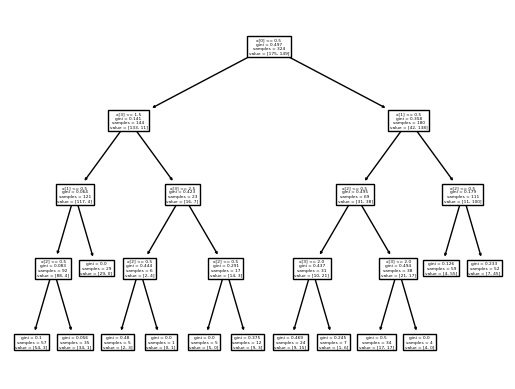

In [24]:
tree.plot_tree(Dtree1);

### test

In [25]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [26]:
y_predict = Dtree1.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_test

2      1
3      1
9      1
10     1
12     1
      ..
685    0
686    0
687    0
688    0
689    0
Name: a16, Length: 366, dtype: int64

In [29]:
accuracy_score(y_test, y_predict)

0.8387978142076503

In [30]:
y_predict

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Set parameter

### Import

In [31]:
from sklearn.tree import DecisionTreeClassifier

### Define

In [32]:
Dtree2 = DecisionTreeClassifier(random_state=0,max_depth=2)#max_depth=ชั้นต้นไม้

### Train

In [33]:
Dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

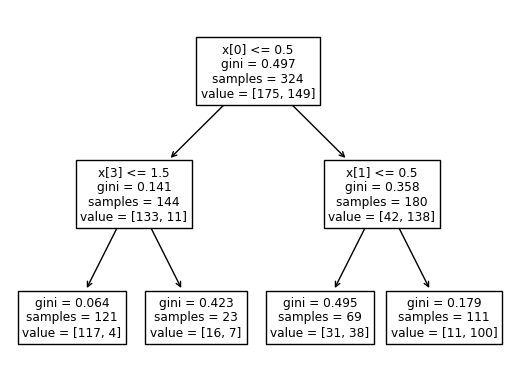

In [34]:
tree.plot_tree(Dtree2);

### Test

In [35]:
y_predict2 = Dtree2.predict(X_test)

In [36]:
accuracy_score(y_test, y_predict2)

0.8715846994535519

#HW3
ให้เเต่ละกลุ่ม สร้างต้นไม้ของตัวเอง โดยปรับเปลี่ยน parameters ให้เเละมาอธิบาย parameter ของตัวเอง ว่ามันคืออะไร
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* เเถว 1 : criterion,max_leaf_nodes
* เเถว 2 : min_samples_split,splitter
* เเถว 3 : min_samples_leaf,max_features
* เเถว 4 : min_impurity_decrease
* เเถว 5 : min_weight_fraction_leaf

##เเถว 2 : min_samples_split,splitte

### min_samples_split

In [37]:
DtreeHW2 = DecisionTreeClassifier(random_state=0,criterion='entropy',min_samples_split=190)

In [38]:
DtreeHW2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=190,
                       random_state=0)

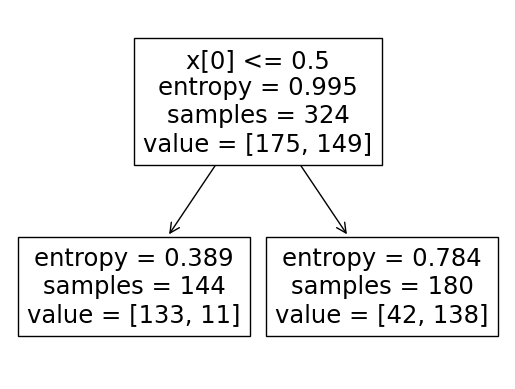

In [39]:
tree.plot_tree(DtreeHW2);

In [40]:
y_predictHW2 = DtreeHW2.predict(X_test)

In [41]:
pd.DataFrame(y_predictHW2).to_excel('predic.xlsx')


In [42]:
y_test.to_excel('ho.xlsx')

In [43]:
accuracy_score(y_test, y_predictHW2)

0.8715846994535519

In [44]:
type(y_test)

pandas.core.series.Series

### splitte

In [45]:
from matplotlib import pyplot as plt

In [46]:
DtreeHW2_1 = DecisionTreeClassifier(random_state=0,criterion="entropy",splitter="random")

In [47]:
DtreeHW2_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0, splitter='random')

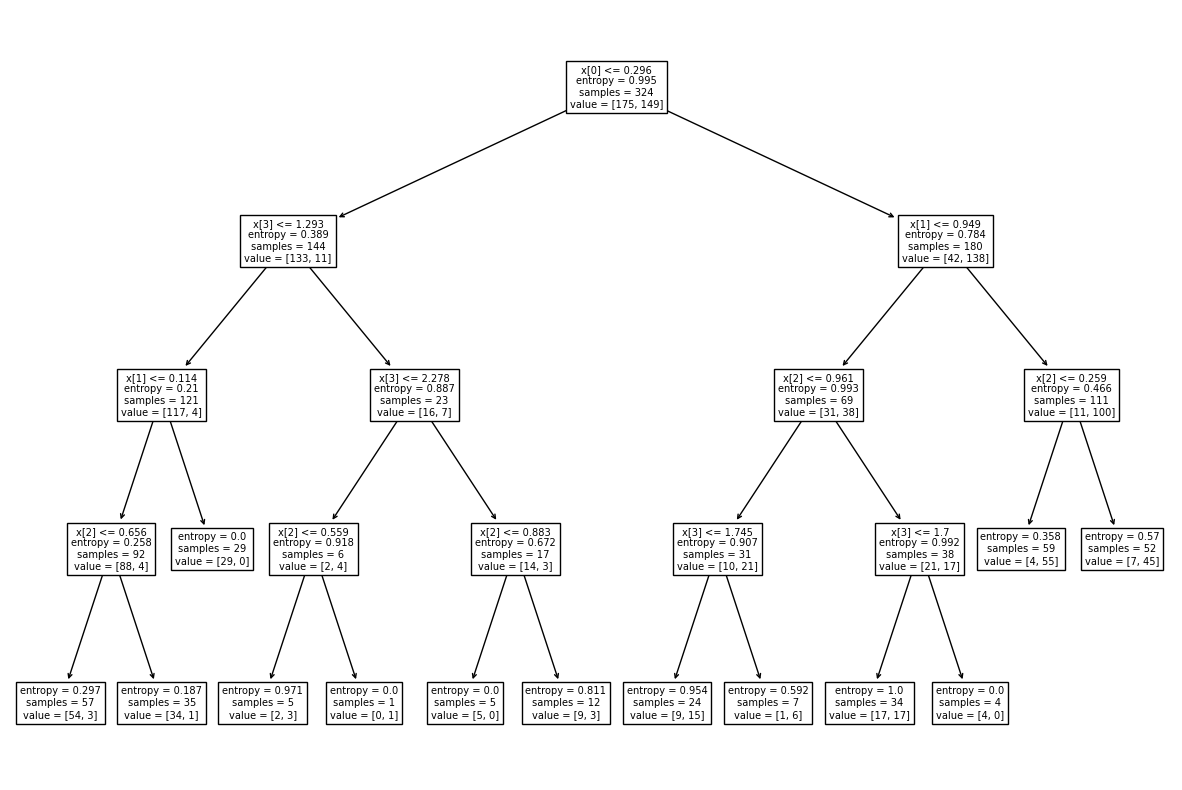

In [48]:
_,ax = plt.subplots(figsize=(15,10))
tree.plot_tree(DtreeHW2_1);


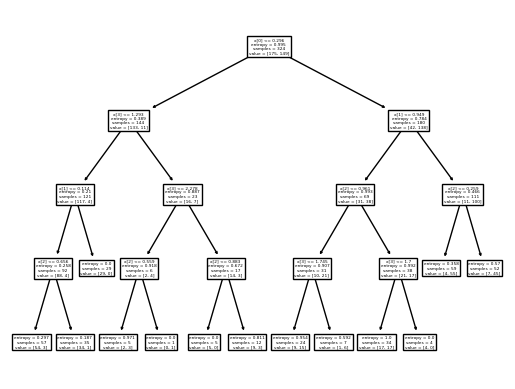

In [49]:
tree.plot_tree(DtreeHW2_1);


In [50]:
y_predictHW2_1 = DtreeHW2_1.predict(X_test)

In [51]:
accuracy_score(y_test, y_predictHW2_1)

0.8387978142076503

In [52]:
DtreeHW2_1.tree_.feature

array([ 0,  3,  1,  2, -2, -2, -2,  3,  2, -2, -2,  2, -2, -2,  1,  2,  3,
       -2, -2,  3, -2, -2,  2, -2, -2], dtype=int64)

In [53]:
DtreeHW2_1.tree_.threshold

array([ 0.29560869,  1.29277795,  0.11365515,  0.65564802, -2.        ,
       -2.        , -2.        ,  2.27779421,  0.55930421, -2.        ,
       -2.        ,  0.88291873, -2.        , -2.        ,  0.94916224,
        0.96135192,  1.74456782, -2.        , -2.        ,  1.69994826,
       -2.        , -2.        ,  0.25938788, -2.        , -2.        ])

### comp

In [54]:
DtreeHW2_1 = DecisionTreeClassifier(random_state=0,criterion="entropy",splitter="best")

In [55]:
DtreeHW2_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

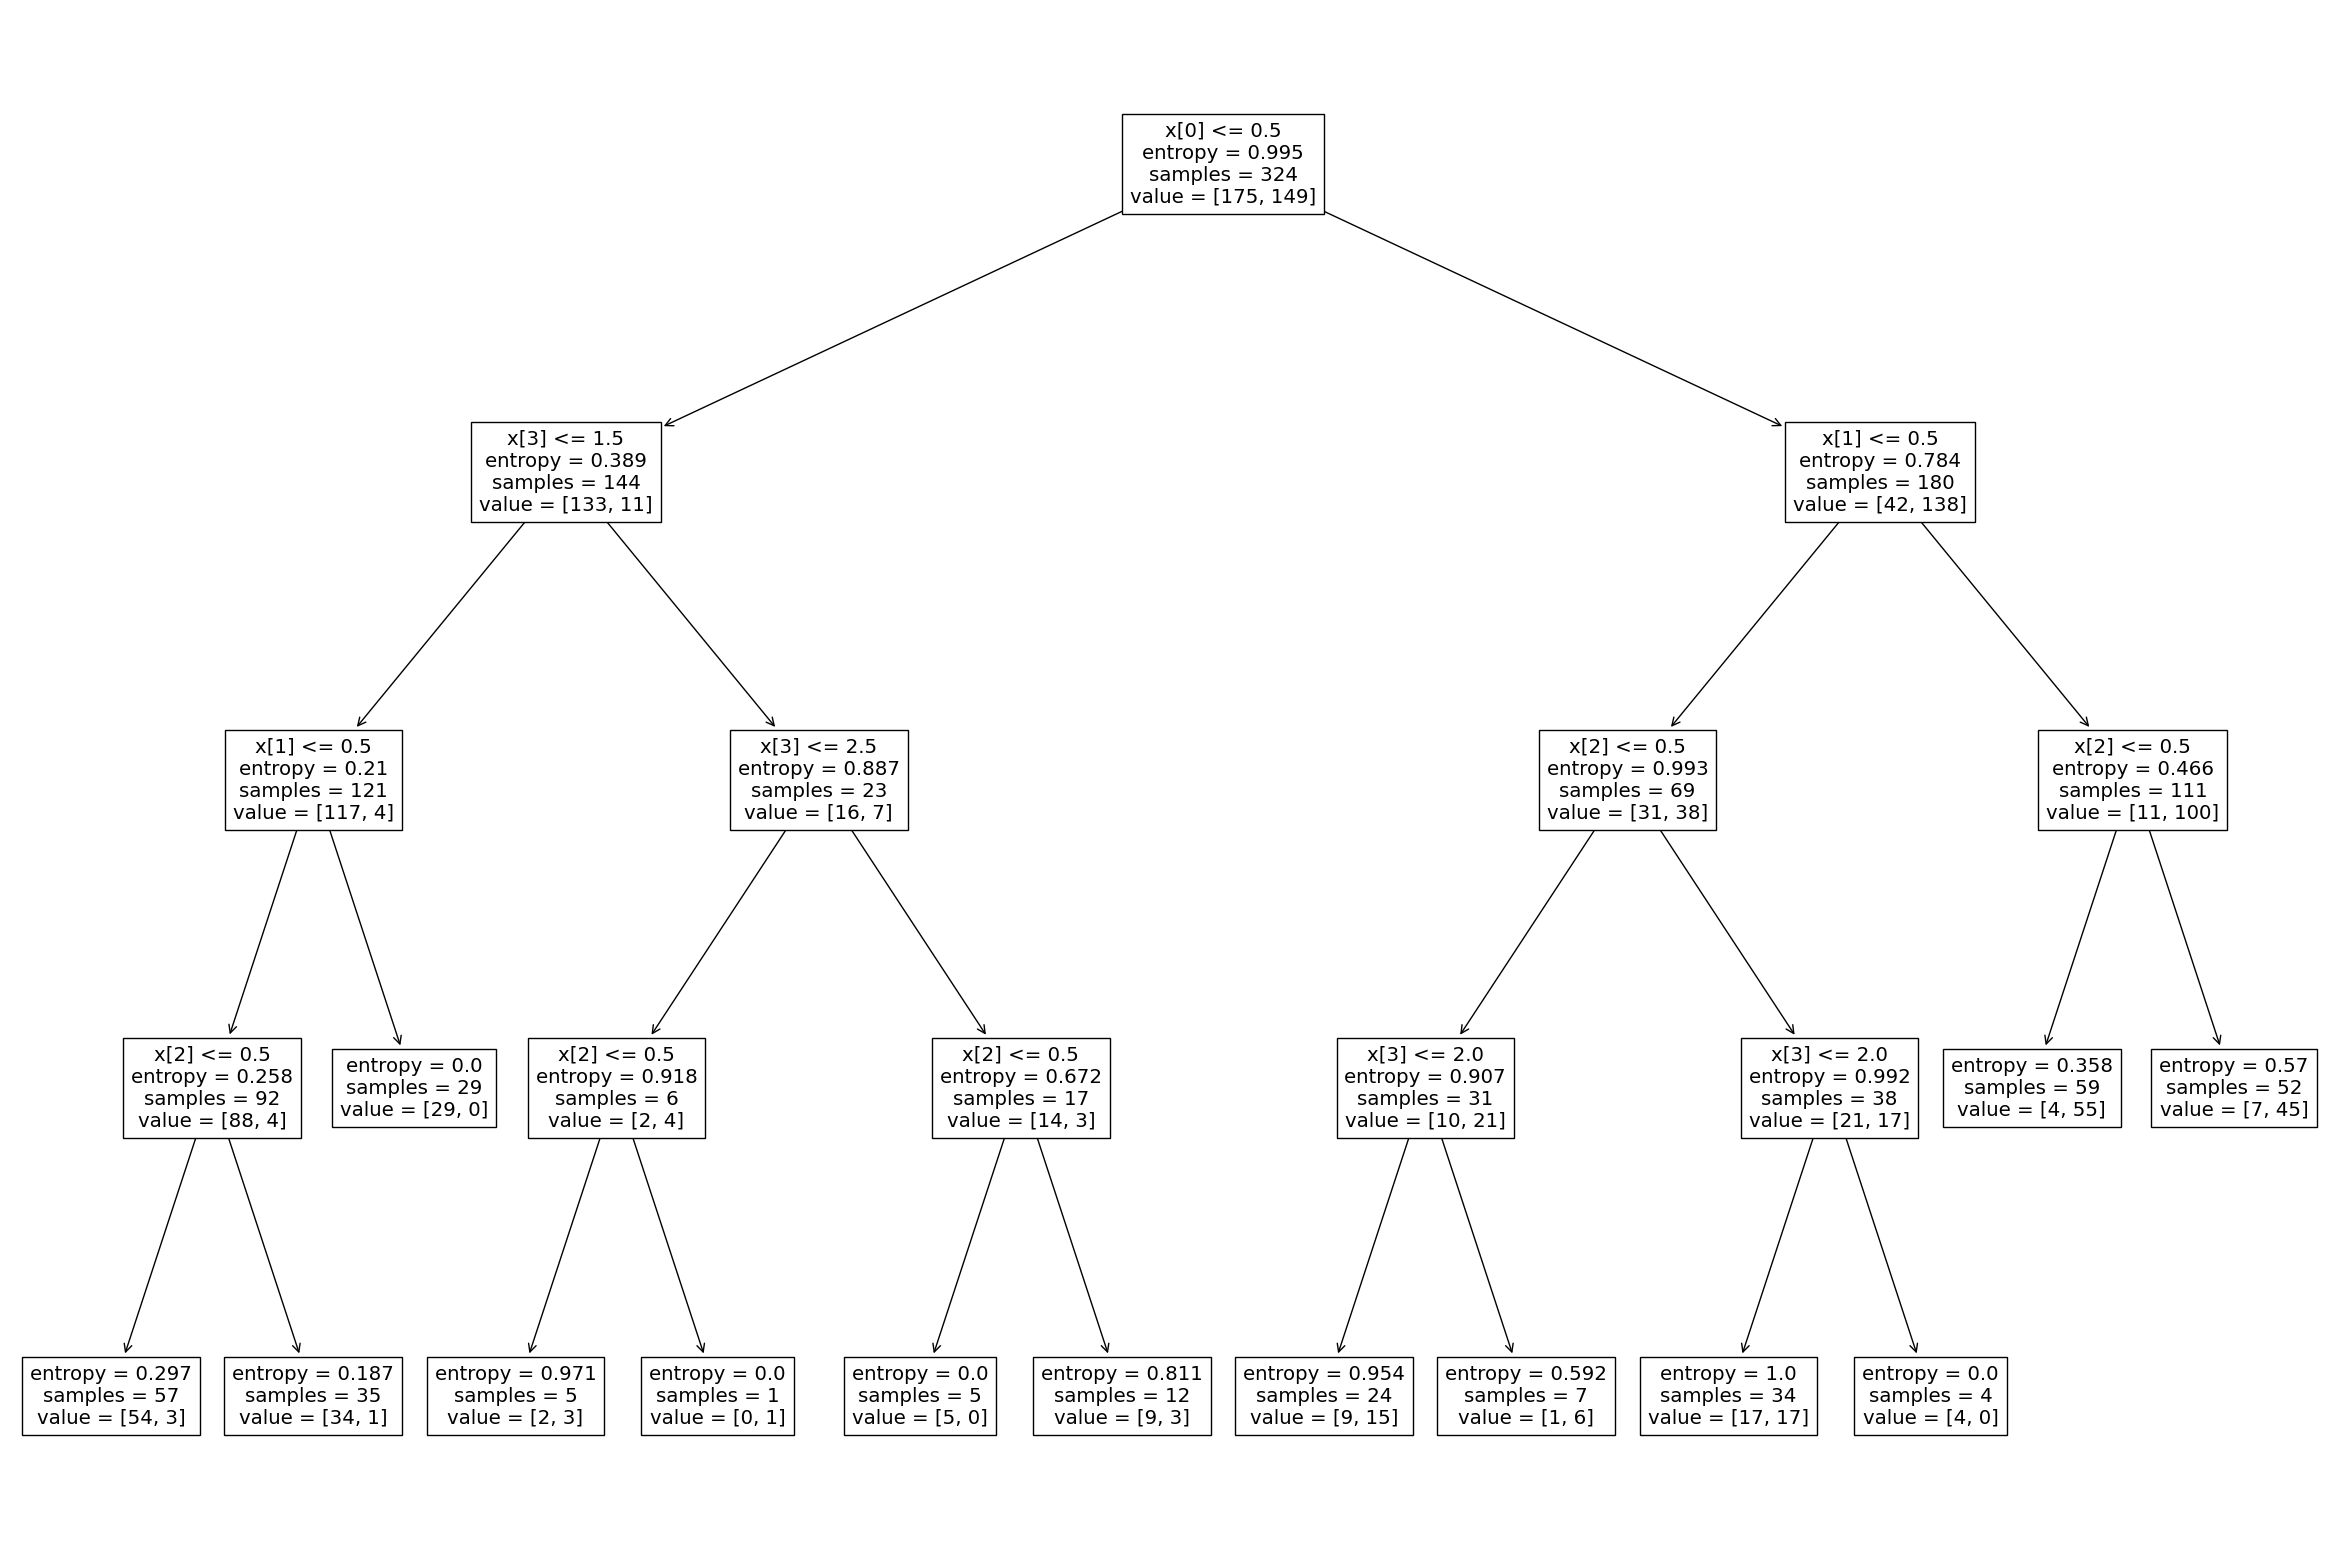

In [56]:
_,ax = plt.subplots(figsize=(30,20))
tree.plot_tree(DtreeHW2_1);

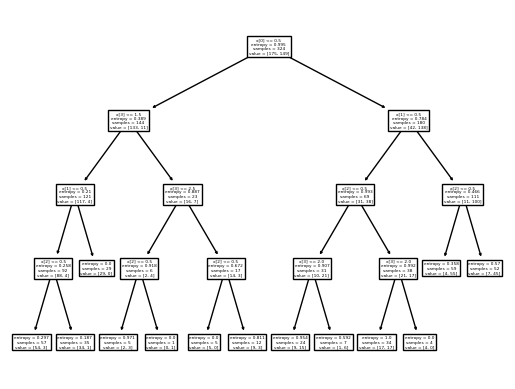

In [57]:
tree.plot_tree(DtreeHW2_1);

In [58]:
y_predictHW2_1 = DtreeHW2_1.predict(X_test)

In [59]:
accuracy_score(y_test, y_predictHW2_1)

0.8387978142076503

In [60]:
DtreeHW2_1.tree_.feature

array([ 0,  3,  1,  2, -2, -2, -2,  3,  2, -2, -2,  2, -2, -2,  1,  2,  3,
       -2, -2,  3, -2, -2,  2, -2, -2], dtype=int64)

In [61]:
DtreeHW2_1.tree_.threshold

array([ 0.5,  1.5,  0.5,  0.5, -2. , -2. , -2. ,  2.5,  0.5, -2. , -2. ,
        0.5, -2. , -2. ,  0.5,  0.5,  2. , -2. , -2. ,  2. , -2. , -2. ,
        0.5, -2. , -2. ])

In [ ]:
features = []
tresholds = []
for random in range(100):
    DtreeHW2_1 = DecisionTreeClassifier(criterion="entropy", splitter='random', random_state=random)
    DtreeHW2_1.fit(X_train,y_train)
    _,ax = plt.subplots(figsize=(15,10))
    tree.plot_tree(DtreeHW2_1)
    y_predictHW2_1 = DtreeHW2_1.predict(X_test)
    print(f'threshold = {DtreeHW2_1.tree_.threshold} \n feature = {DtreeHW2_1.tree_.feature} \n accuracy_score{accuracy_score(y_test, y_predictHW2_1)}')

    # features.append(DtreeHW2_1.tree_.feature[0])
    # tresholds.append(DtreeHW2_1.tree_.threshold[0])

threshold = [ 0.29560869  1.29277795  0.11365515  0.65564802 -2.         -2.
 -2.          2.27779421  0.55930421 -2.         -2.          0.88291873
 -2.         -2.          0.94916224  0.96135192  1.74456782 -2.
 -2.          1.69994826 -2.         -2.          0.25938788 -2.
 -2.        ] 
 feature = [ 0  3  1  2 -2 -2 -2  3  2 -2 -2  2 -2 -2  1  2  3 -2 -2  3 -2 -2  2 -2
 -2] 
 accuracy_score0.8387978142076503
threshold = [ 0.55625146  1.45465906  0.75238716  0.11227082 -2.         -2.
 -2.          2.33927518  0.39512985 -2.         -2.          0.92028018
 -2.         -2.          0.6496558   0.04266609  2.39846649 -2.
 -2.          2.09641399 -2.         -2.          0.71401878 -2.
 -2.        ] 
 feature = [ 0  3  1  2 -2 -2 -2  3  2 -2 -2  2 -2 -2  1  2  3 -2 -2  3 -2 -2  2 -2
 -2] 
 accuracy_score0.8387978142076503
threshold = [ 0.41543057  1.33119313  0.4186467   0.08772378 -2.         -2.
 -2.          2.10625519  0.80229431 -2.         -2.          0.05914788
 -2.        

<ipython-input-62-eb36fbca2a9b>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _,ax = plt.subplots(figsize=(15,10))


threshold = [ 0.86084615  0.11459382  2.53144818  1.85908923  0.69327506 -2.
 -2.          0.63676309 -2.         -2.          0.29677126 -2.
 -2.         -2.          0.07615322  0.856652    2.33859614 -2.
 -2.          2.24358734 -2.         -2.          0.30780556 -2.
 -2.        ] 
 feature = [ 0  1  3  3  2 -2 -2  2 -2 -2  2 -2 -2 -2  1  2  3 -2 -2  3 -2 -2  2 -2
 -2] 
 accuracy_score0.8387978142076503
threshold = [ 0.68281141  0.55448314  2.58868098  1.3948257   0.27726085 -2.
 -2.          0.2167715  -2.         -2.          0.38858014 -2.
 -2.         -2.          0.7151375   0.34345238  1.57008817 -2.
 -2.          1.71250667 -2.         -2.          0.23142506 -2.
 -2.        ] 
 feature = [ 0  1  3  3  2 -2 -2  2 -2 -2  2 -2 -2 -2  1  2  3 -2 -2  3 -2 -2  2 -2
 -2] 
 accuracy_score0.8387978142076503
threshold = [ 0.14450673  0.80334206  2.38213455  1.4049641   0.7649175  -2.
 -2.          0.09821064 -2.         -2.          0.98246539 -2.
 -2.         -2.          0.96549127

In [ ]:
DtreeHW2_1.tree_.feature

In [ ]:
DtreeHW2_1.tree_.threshold

In [ ]:
tresholds

In [ ]:
features

# ~~HW5~~

Build a decision tree model which has better accuracy than 0.86 and describe about parameters you set.